<a href="https://colab.research.google.com/github/isabelsanttana/Analise_de_dados/blob/main/Trabalho_Correlacao_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<?xml version="1.0" encoding="UTF-8"?>
<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://www.uvv.br/wp-content/themes/uvvBr/templates/assets//img/logouvv.svg" alt="UVV-LOGO" style = width="100px"; height="100px">
        </CENTER>    
        <CENTER><b>Estatística para Ciência de Dados</b><br/>
        <CENTER><b>Prof: Saulo Pereira Ribeiro</b>
        <CENTER><b>Trabalho 2 - Correlação e Regressão Linear</b><br/></CENTER><br/>

***

## Trabalho de Correlação e Regressão Linear

Com base no que foi estudado, realize uma análise descritiva básica de um conjunto de dados selecionado por você.


# Dataset do projeto
***

<?xml version="1.0" encoding="UTF-8"?>
<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large186.jpg" alt="avião" style = width="900px"; height="200px">
        </CENTER>

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='blue'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros duplicados;
> 2. Foram eliminados os registros nulos;


### Importando bibliotecas



In [ ]:
# down grade da versão do scipy
!pip install scipy==1.2 --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Lendo o dataset do projeto

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/UVV/Trabalhos/Estatistica/trab_2/winequality-white.csv', sep=";")

In [ ]:
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Sobre os dados

In [ ]:
dados.info()

In [ ]:
# Qnt de linhas e colunas
dados.shape 

In [ ]:
dados.isnull().sum()

In [ ]:
# colunas do dataset
dados.columns.to_list()

### Tratando os dados

In [ ]:
# retirar duplicados/linhas vazias

dados = dados.drop_duplicates()
dados.dropna(how='all', inplace=True)

# Estatísticas descritivas

In [ ]:
dados.describe()


# Análise gráfica



In [ ]:
ax = sns.boxplot(data=dados, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax


In [ ]:
# qualidade do vinho
plt.figure(figsize=(10,5))
sns.histplot(x='quality', data=dados)

# Este diagrama mostra que a qualidade média do vinho é de qualidade média (de 5 a 7)

# Análise da correlação


In [ ]:
correlacao = dados.corr()
correlacao

In [ ]:
corr = correlacao.quality
corr = corr.drop(['quality'], axis=0) 
corr.sort_values(ascending=False)

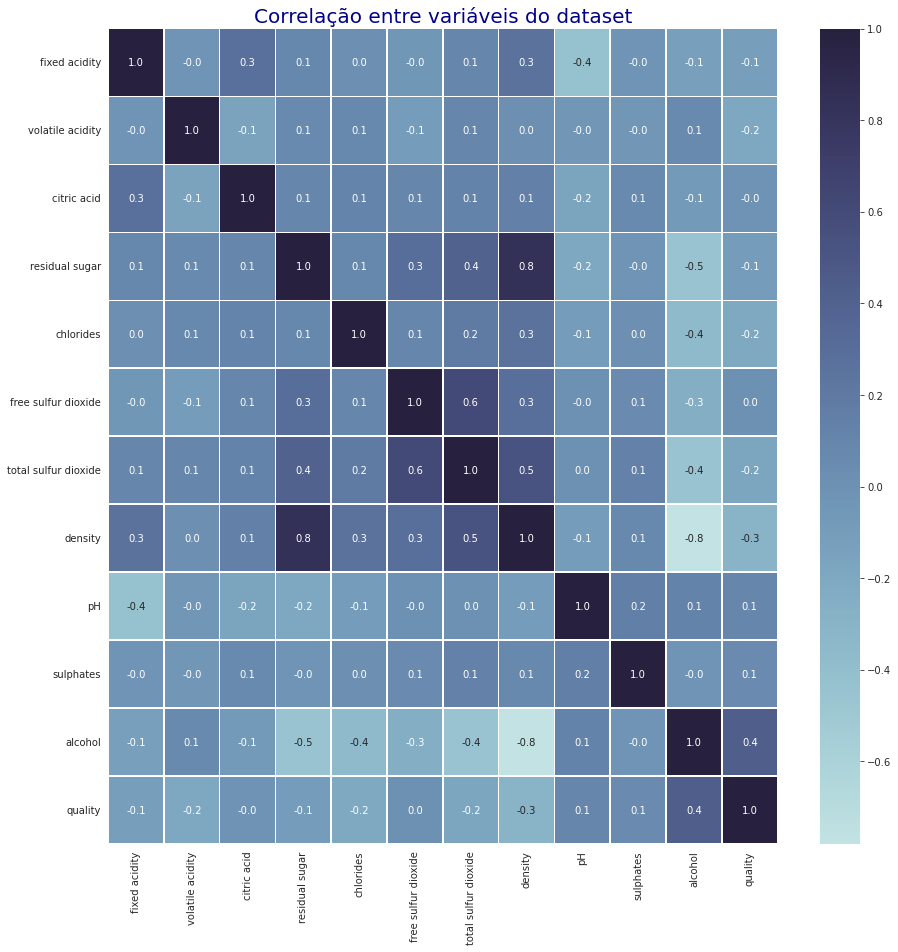

In [ ]:
plt.figure(figsize=(15,15))
plot = sns.heatmap(correlacao,annot = True,fmt=".1f",linewidths=.6,cmap= sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.title('Correlação entre variáveis do dataset',fontsize= 20,color='darkblue')
plt.show()

<Figure size 720x720 with 0 Axes>

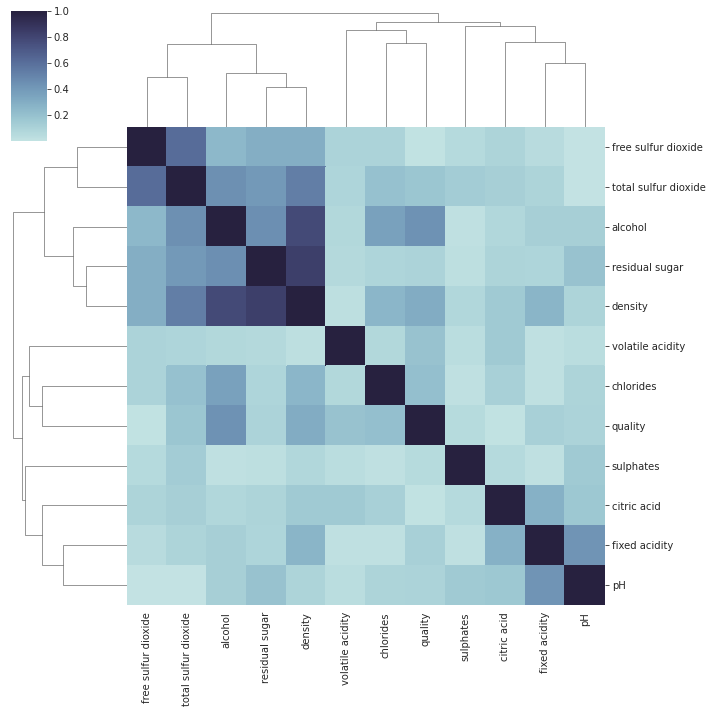

In [ ]:
plt.figure(figsize=(10,10))
sns.clustermap(abs(correlacao), cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


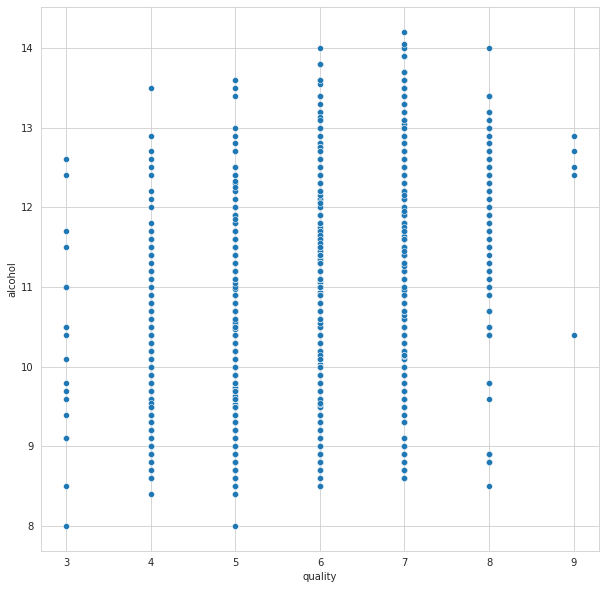

In [ ]:
# Relação Alcool X Qualidade
plt.figure(figsize=(10,10))
sns.scatterplot(dados.quality, dados.alcohol)

In [ ]:
dataset = {
    'Y_Qualidade_do_Vinho': dados.quality,
    'X_Alcool': dados.alcohol}

dataset = pd.DataFrame(dataset)
dataset.head()

In [ ]:
dataset.corr()

# Modelo de regressão linear simples


In [ ]:
y = dados.quality
x = sm.add_constant(dados.alcohol)
Y.head()

In [ ]:
X.head(30)

In [ ]:
# Estimando o modelo

resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

### Obtendo as previsões dentro da amostra

In [ ]:
dataset['Y Previsto'] = resultado_regressao.predict()
dataset

# Função para estimar o valor de Y

In [ ]:
resultado_regressao.params

const      6.956699
quality    0.605244
dtype: float64

In [ ]:
beta1 = resultado_regressao.params[0]
beta2 = resultado_regressao.params[1]

In [ ]:
def prever(x):
  return beta1 + beta2 * x

In [ ]:
prever(7).round(2)

11.19

In [ ]:
prever(3).round(2)

8.77

In [ ]:
prever(5).round(2)

9.98

#  Rquadrado

In [ ]:
resultado_regressao.rsquared

0.18972533274925607

# EXTRA